# Instalamos librerias

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Data_collector/datos_criptomonedas_procesados.csv')

In [3]:
df.head()

,#,Moneda,Precio,1 h,24 h,7 d,Volumen en 24 h,Cap. de mercado,FDV,Cap merc/FDV
0,1,Bitcoin BTC,"$29.307,18",0.1%,-0.0%,-1.5%,$7.723.718.124,$570.402.375.708,$615.595.340.248,093
1,2,Ethereum ETH,"$1.839,65",0.1%,-0.2%,-0.7%,$4.068.070.711,$221.092.122.908,$221.092.122.908,100
2,3,Tether USDT,"$0,999196",0.0%,0.0%,-0.0%,$10.387.278.843,$83.318.841.504,$83.318.841.504,100
3,4,BNB BNB,"$239,14",0.1%,-0.4%,-2.4%,$337.229.328,$36.784.347.479,$47.816.544.843,077
4,5,XRP XRP,"$0,621420",-0.5%,-1.1%,-2.8%,$831.972.828,$32.848.276.921,$62.227.631.637,053


In [4]:
df.tail()

,#,Moneda,Precio,1 h,24 h,7 d,Volumen en 24 h,Cap. de mercado,FDV,Cap merc/FDV
995,996,IMPT IMPT,"$0,006566649548",0.2%,-0.8%,10.1%,$1.598.427,$8.453.407,$19.703.281,043
996,997,Prosper PROS,"$0,278011",-0.7%,-4.4%,-2.7%,$1.045.387,$8.450.081,$27.813.004,030
997,998,Grizzly Honey GHNY,"$6,82",-0.0%,-1.4%,-4.7%,"$5.175,10",$8.419.248,$8.419.774,100
998,999,SIX Network SIX,"$0,030740626072",1.7%,16.9%,25.9%,$1.538.350,$8.419.150,$30.751.899,027
999,1000,Bitrue Coin BTR,"$0,030692004904",0.1%,-0.2%,-6.7%,$2.262.443,$8.409.523,$30.689.172,027


In [5]:
df.rename(columns={
    "1 h": "Cambio 1 h",
    "24 h": "Cambio 24 h",
    "7 d": "Cambio 7 d",
    "Volumen en 24 h": "Volumen en 24 horas",
    "Cap. de mercado": "Cap. de mercado",
    "FDV": "FDV",
    "Cap merc/FDV": "Cap merc/FDV"
}, inplace=True)

In [6]:
df.shape

(1000, 10)

## Verificamos si el dataframe tiene nullos y me haga un conteo

In [7]:
df.isnull().sum()

#                      0
Moneda                 0
Precio                 0
Cambio 1 h             5
Cambio 24 h            0
Cambio 7 d             2
Volumen en 24 horas    0
Cap. de mercado        0
FDV                    0
Cap merc/FDV           0
dtype: int64

In [8]:
df.dtypes

#                       int64
Moneda                 object
Precio                 object
Cambio 1 h             object
Cambio 24 h            object
Cambio 7 d             object
Volumen en 24 horas    object
Cap. de mercado        object
FDV                    object
Cap merc/FDV           object
dtype: object

<AxesSubplot: >

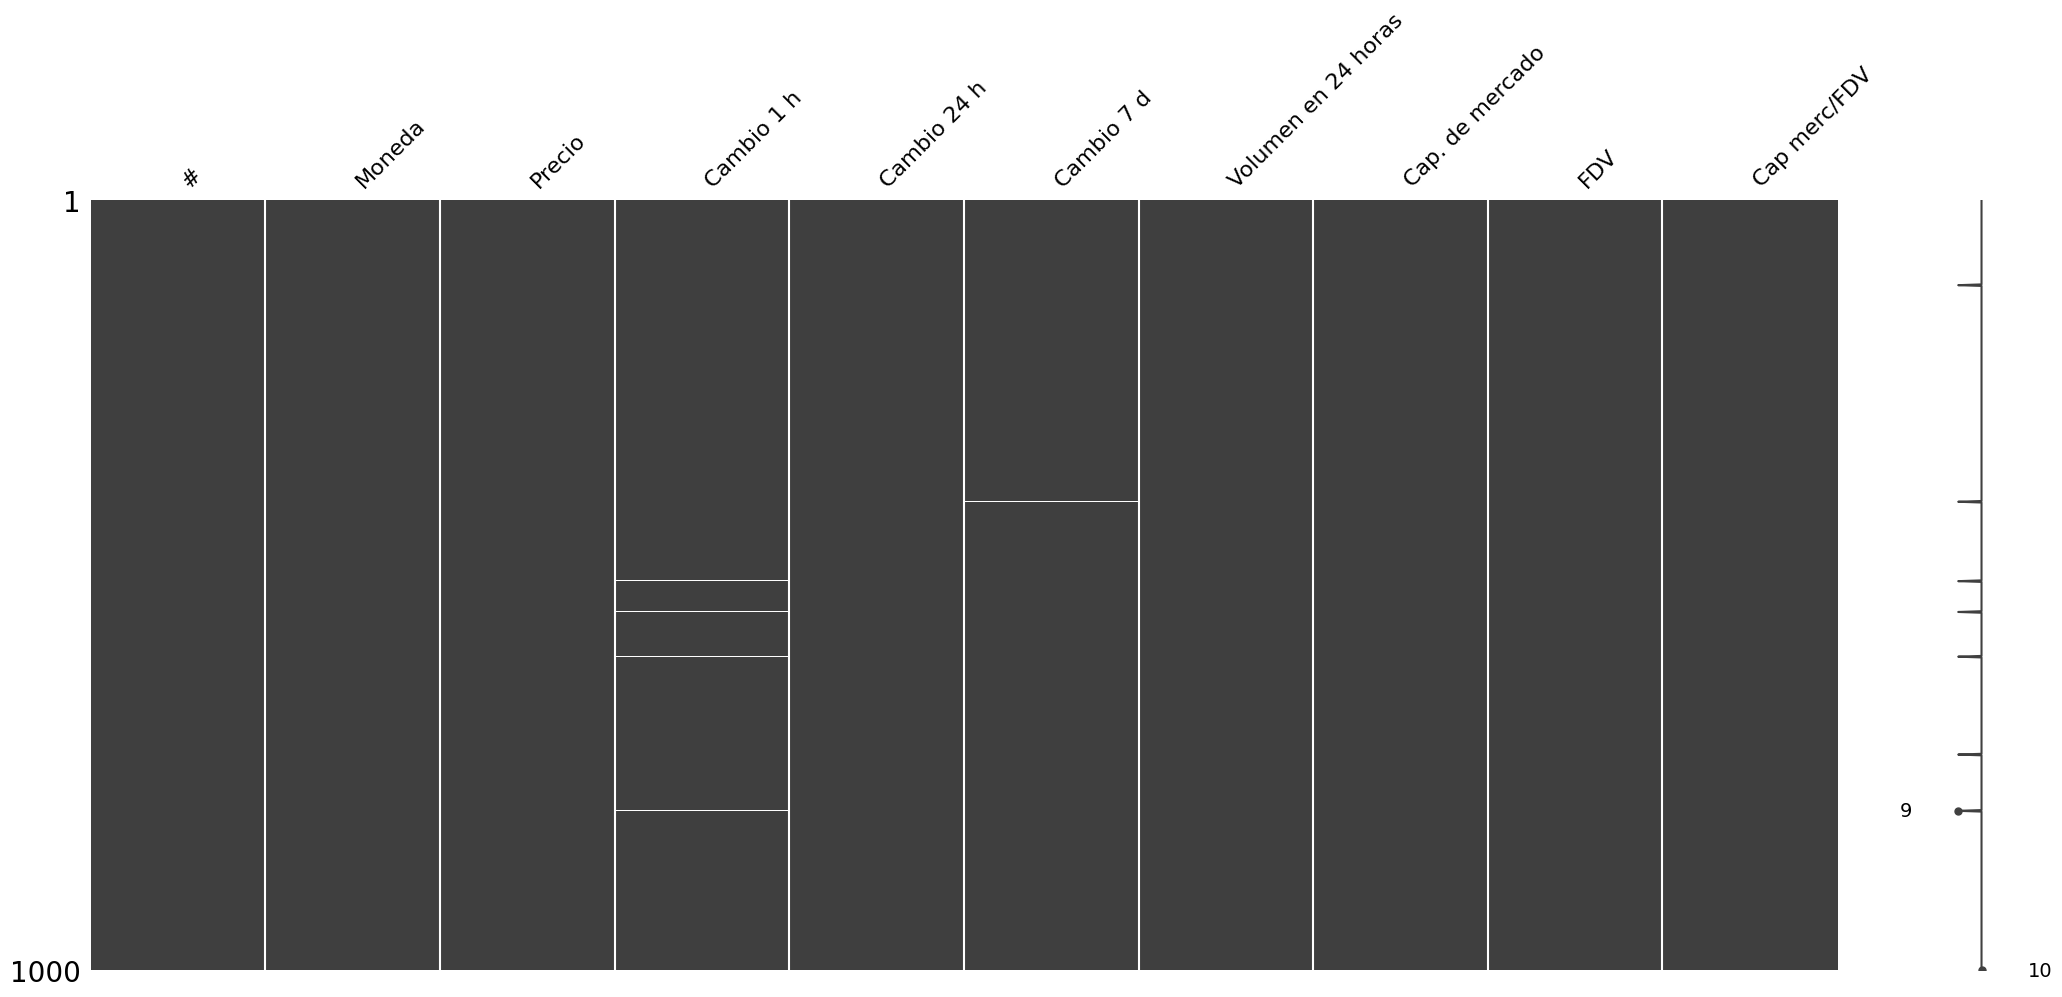

In [9]:
msno.matrix(df)

In [10]:
df.head()

,#,Moneda,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
0,1,Bitcoin BTC,"$29.307,18",0.1%,-0.0%,-1.5%,$7.723.718.124,$570.402.375.708,$615.595.340.248,093
1,2,Ethereum ETH,"$1.839,65",0.1%,-0.2%,-0.7%,$4.068.070.711,$221.092.122.908,$221.092.122.908,100
2,3,Tether USDT,"$0,999196",0.0%,0.0%,-0.0%,$10.387.278.843,$83.318.841.504,$83.318.841.504,100
3,4,BNB BNB,"$239,14",0.1%,-0.4%,-2.4%,$337.229.328,$36.784.347.479,$47.816.544.843,077
4,5,XRP XRP,"$0,621420",-0.5%,-1.1%,-2.8%,$831.972.828,$32.848.276.921,$62.227.631.637,053


## ETL

In [11]:
# Removiendo símbolo % y convirtiendo cambios a números negativos y luego a números decimales
df[['Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d']] = df[['Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d']].replace('-', 0).replace('%', '', regex=True).astype(float)

In [12]:
# Extraer el nombre y las siglas de la columna 'Moneda'
df['Siglas'] = df['Moneda'].apply(lambda x: x.split(' ')[-1])

# Eliminar las siglas de la columna 'Moneda'
df['Moneda'] = df['Moneda'].apply(lambda x: ' '.join(x.split(' ')[:-1]))


# Reorganizar las columnas
new_columns_order = ['#', 'Moneda', 'Siglas', 'Precio', 'Cambio 1 h', 'Cambio 24 h', 'Cambio 7 d', 'Volumen en 24 horas', 'Cap. de mercado', 'FDV', 'Cap merc/FDV']
df = df[new_columns_order]

In [13]:
df.head(10)

,#,Moneda,Siglas,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
0,1,Bitcoin,BTC,"$29.307,18",0.1,-0.0,-1.5,$7.723.718.124,$570.402.375.708,$615.595.340.248,093
1,2,Ethereum,ETH,"$1.839,65",0.1,-0.2,-0.7,$4.068.070.711,$221.092.122.908,$221.092.122.908,100
2,3,Tether,USDT,"$0,999196",0.0,0.0,-0.0,$10.387.278.843,$83.318.841.504,$83.318.841.504,100
3,4,BNB,BNB,"$239,14",0.1,-0.4,-2.4,$337.229.328,$36.784.347.479,$47.816.544.843,077
4,5,XRP,XRP,"$0,621420",-0.5,-1.1,-2.8,$831.972.828,$32.848.276.921,$62.227.631.637,053
5,6,USD Coin,USDC,"$1,00",0.0,-0.0,-0.0,$1.955.674.086,$25.934.692.670,$25.934.642.302,100
6,7,Lido Staked Ether,STETH,"$1.838,45",0.1,-0.2,-0.7,$18.060.501,$14.939.494.488,$14.945.387.327,100
7,8,Dogecoin,DOGE,"$0,073272554283",-0.5,-1.1,-2.5,$416.783.644,$10.315.219.673,$10.315.227.743,100
8,9,Cardano,ADA,"$0,287258",-0.4,-0.6,-4.4,$108.584.915,$10.078.925.610,$12.941.971.261,078
9,10,Solana,SOL,"$24,62",-0.3,-0.6,2.0,$342.299.308,$10.009.146.571,$13.677.420.671,073


## Reemplazo de caracteres 

In [14]:
# Definir una función para limpiar y convertir valores de moneda
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace('.', '').replace(',', '.')
        return value
    return value

# Aplicar la función a la columna "Precio" y convertirla a tipo float
df['Precio'] = df['Precio'].apply(clean_currency)
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce', downcast='float')

# Aplicar la función a las columnas de moneda y convertirlas a enteros
numeric_columns = ['Volumen en 24 horas', 'Cap. de mercado', 'FDV']
for col in numeric_columns:
    df[col] = df[col].apply(clean_currency)
    df[col] = pd.to_numeric(df[col].str.replace('\.', '', regex=True), errors='coerce', downcast='integer')

# Formatear la columna "Precio" para mostrar dos decimales
formatted_df = df.copy()
formatted_df['Precio'] = formatted_df['Precio'].apply(lambda x: "{:.2f}".format(x))

# Formatear las columnas enteras con separadores de miles
formatted_df['Volumen en 24 horas'] = formatted_df['Volumen en 24 horas'].apply(lambda x: "{:,.0f}".format(x).replace(',', ''))
formatted_df['Cap. de mercado'] = formatted_df['Cap. de mercado'].apply(lambda x: "{:,.0f}".format(x).replace(',', ''))
formatted_df['FDV'] = formatted_df['FDV'].apply(lambda x: "{:,.0f}".format(x).replace(',', '')) 

In [15]:
formatted_df.head()

,#,Moneda,Siglas,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
0,1,Bitcoin,BTC,29307.18,0.1,-0.0,-1.5,7723718124,570402375708,615595340248,093
1,2,Ethereum,ETH,1839.65,0.1,-0.2,-0.7,4068070711,221092122908,221092122908,100
2,3,Tether,USDT,1.00,0.0,0.0,-0.0,10387278843,83318841504,83318841504,100
3,4,BNB,BNB,239.14,0.1,-0.4,-2.4,337229328,36784347479,47816544843,077
4,5,XRP,XRP,0.62,-0.5,-1.1,-2.8,831972828,32848276921,62227631637,053


In [16]:
# Convertir columna "Precio" a tipo de dato float con 2 decimales
formatted_df["Precio"] = pd.to_numeric(formatted_df["Precio"], errors="coerce").apply(lambda x: round(x, 2))

# Convertir columnas específicas a enteros de 64 bits
columns_to_convert = ["Volumen en 24 horas", "Cap. de mercado", "FDV"]

for col in columns_to_convert:
    formatted_df[col] = pd.to_numeric(formatted_df[col], errors='coerce').fillna(0).astype("int64")
    
formatted_df['Cambio 1 h'].fillna(0, inplace=True)
formatted_df['Cambio 7 d'].fillna(0, inplace=True)

formatted_df = formatted_df.drop(formatted_df.columns[0], axis=1)


In [17]:
formatted_df.dtypes

Moneda                  object
Siglas                  object
Precio                 float64
Cambio 1 h             float64
Cambio 24 h            float64
Cambio 7 d             float64
Volumen en 24 horas      int64
Cap. de mercado          int64
FDV                      int64
Cap merc/FDV            object
dtype: object

In [18]:
formatted_df.isnull().sum()

Moneda                 0
Siglas                 0
Precio                 0
Cambio 1 h             0
Cambio 24 h            0
Cambio 7 d             0
Volumen en 24 horas    0
Cap. de mercado        0
FDV                    0
Cap merc/FDV           0
dtype: int64

In [19]:
formatted_df.head()

,Moneda,Siglas,Precio,Cambio 1 h,Cambio 24 h,Cambio 7 d,Volumen en 24 horas,Cap. de mercado,FDV,Cap merc/FDV
0,Bitcoin,BTC,29307.18,0.1,-0.0,-1.5,7723718124,570402375708,615595340248,093
1,Ethereum,ETH,1839.65,0.1,-0.2,-0.7,4068070711,221092122908,221092122908,100
2,Tether,USDT,1.00,0.0,0.0,-0.0,10387278843,83318841504,83318841504,100
3,BNB,BNB,239.14,0.1,-0.4,-2.4,337229328,36784347479,47816544843,077
4,XRP,XRP,0.62,-0.5,-1.1,-2.8,831972828,32848276921,62227631637,053


In [20]:
formatted_df.to_csv('Data_collector/Data_ETL.csv', index=False)

# Graficas

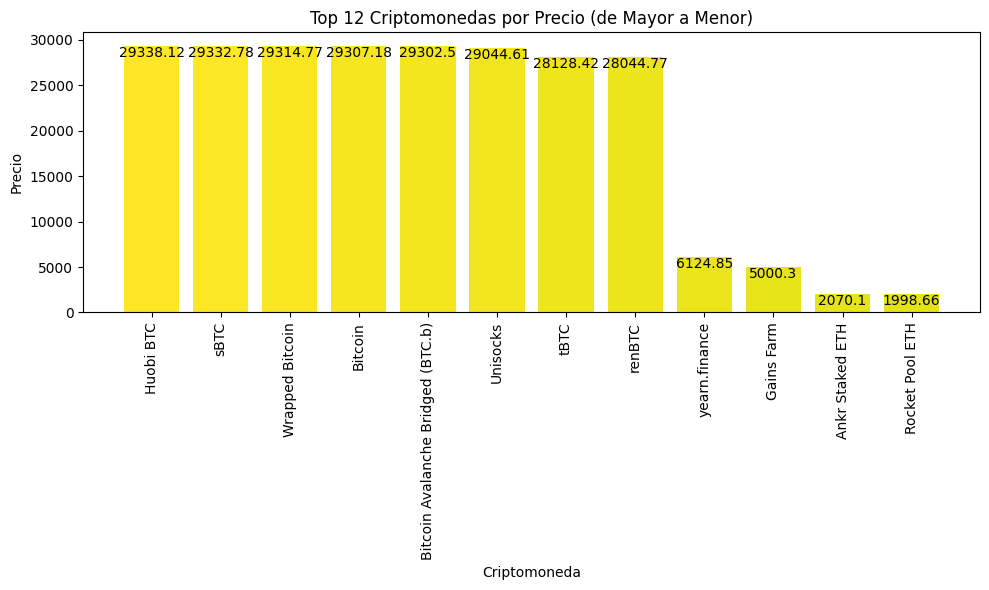

In [21]:
# Ordena el DataFrame por el precio en orden descendente y selecciona los 20 primeros registros
df_top12 = df.sort_values(by='Precio', ascending=False).head(12)

plt.figure(figsize=(10, 6))

# Colores variados para las barras
colors = plt.cm.viridis_r(range(len(df_top12)))

# Gráfico de barras para el precio de las 20 mejores criptomonedas con separación
bars = plt.bar(df_top12["Moneda"], df_top12["Precio"], color=colors)
bar_width = 5
plt.xticks(rotation=90)
plt.xlabel("Criptomoneda")
plt.ylabel("Precio")
plt.title("Top 12 Criptomonedas por Precio (de Mayor a Menor)")
plt.tight_layout()

# Agregar los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom' if yval < 0 else 'top', ha='center')


plt.show()



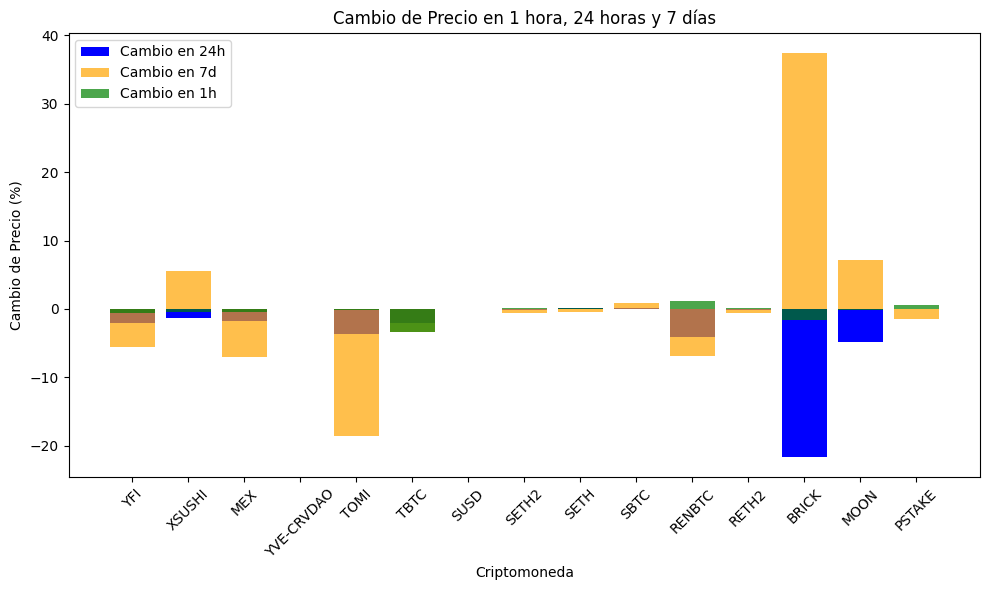

In [22]:
# Ordenar y seleccionar las 15 principales monedas
df_top15 = formatted_df.sort_values(by='Moneda', ascending=False).head(15)

# Crear una figura y gráficos de barras
plt.figure(figsize=(10, 6))

# Agregar barras para Cambio en 24h, Cambio en 7d y Cambio en 1h con diferentes colores
plt.bar(df_top15["Moneda"], df_top15["Cambio 24 h"], label="Cambio en 24h", color='blue')
plt.bar(df_top15["Moneda"], df_top15["Cambio 7 d"], label="Cambio en 7d", alpha=0.7, color='orange')
plt.bar(df_top15["Moneda"], df_top15["Cambio 1 h"], label="Cambio en 1h", alpha=0.7, color='green')

# Personalizar el gráfico
plt.xticks(df_top15["Moneda"], df_top15["Siglas"], rotation=45)
plt.xlabel("Criptomoneda")
plt.ylabel("Cambio de Precio (%)")
plt.title("Cambio de Precio en 1 hora, 24 horas y 7 días")
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

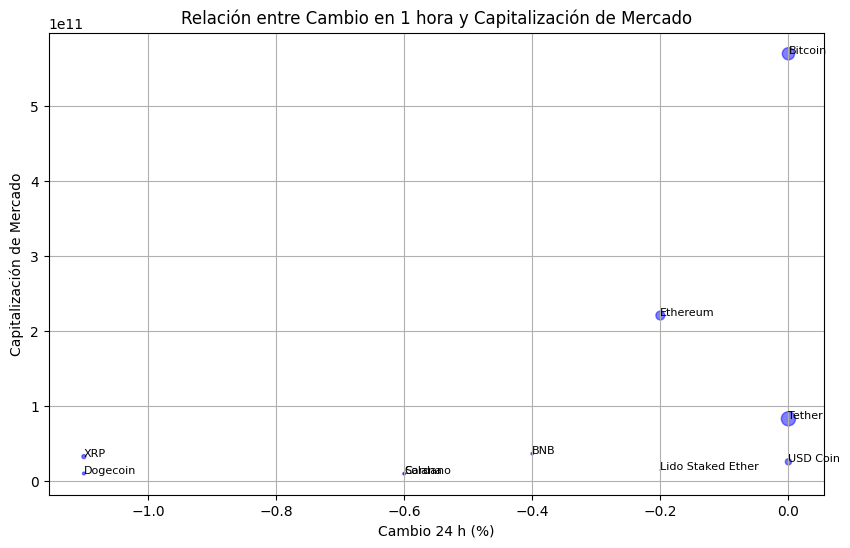

In [23]:
# Subconjunto de las primeras cinco criptomonedas
subset_df = formatted_df.head(10)

plt.figure(figsize=(10, 6))

# Ajusta el tamaño de las burbujas en función del volumen en 24 horas
bubble_sizes = subset_df["Volumen en 24 horas"] / 100000000  # Sin necesidad de replace y astype
plt.scatter(subset_df["Cambio 24 h"], subset_df["Cap. de mercado"], s=bubble_sizes, color='blue', alpha=0.5)

plt.xlabel("Cambio 24 h (%)")
plt.ylabel("Capitalización de Mercado")
plt.title("Relación entre Cambio en 1 hora y Capitalización de Mercado")
plt.grid()

# Añadir anotaciones con los nombres de las criptomonedas
for i, row in subset_df.iterrows():
    plt.annotate(row["Moneda"], (row["Cambio 24 h"], row["Cap. de mercado"]), fontsize=8)

plt.show()

# Conclusión:

El proceso de Extracción, Transformación y Carga (ETL) aplicado al conjunto de datos de criptomonedas ha proporcionado una comprensión profunda de las características y patrones presentes en la información financiera. Aquí se destacan los principales hallazgos y las implicaciones para la toma de decisiones:

Extracción:
Se recopiló y se accedió a un conjunto de datos que contiene información sobre precios, cambios en diferentes intervalos de tiempo, volumen de negociación y capitalización de mercado de diversas criptomonedas.

Transformación:
Mediante técnicas de visualización, estadísticas y análisis numérico, se exploraron las propiedades de las criptomonedas. Se identificaron valores atípicos, patrones de cambio y relaciones entre las variables.

Carga:
Se aplicó el algoritmo KMeans para agrupar las criptomonedas en clústeres con perfiles similares. Además, se utilizó el análisis de componentes principales (PCA) para reducir la dimensionalidad y resaltar la variabilidad significativa.(EDA_Bitcoins.ipynb)

********************************************************************************************************************************
# Hallazgos y Decisiones:

Comportamiento Variable: Las criptomonedas exhiben una variabilidad considerable en sus precios y cambios en diferentes marcos de tiempo. Esto sugiere que el mercado es dinámico y susceptible a cambios rápidos.

Diversificación: Los inversores pueden aprovechar la diversificación al distribuir sus fondos entre diferentes grupos de criptomonedas con comportamientos similares. Esto ayuda a reducir el riesgo asociado con movimientos drásticos en un solo grupo.

Identificación de Tendencias: Observando los cambios en los grupos de criptomonedas a lo largo del tiempo, es posible identificar tendencias y anticipar posibles movimientos futuros del mercado.

Gestión de Riesgos: El análisis de varianza y distribución proporciona información crucial para evaluar el nivel de riesgo asociado con cada moneda. Los inversores pueden tomar decisiones informadas sobre la cantidad de inversión en monedas volátiles versus monedas estables.

Optimización del Portafolio: La comprensión de la varianza explicada por cada componente principal permite a los inversores seleccionar monedas que impacten significativamente en la diversificación de sus carteras.

Monitoreo Continuo: Dado que el mercado de criptomonedas es altamente volátil, el análisis y la monitorización continuos de los grupos y tendencias son esenciales para tomar decisiones oportunas y ajustar las estrategias.


***************************************************************************************************************************